<a href="https://colab.research.google.com/github/frnkly/jayne-eats/blob/main/ml/notes/model-exploration-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Exploration using TensorFlow



# Data

In [2]:
# Dataset, organized as: [classification, consistency, temperature, [ingredients]].
raw_dataset = [
  # Pizzas
  [False, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'oil', 'olive', 'onion', 'salt', 'sugar', 'tomato']], # Olives
  [False, 'solid', 'warm', ['anchovy', 'bell_pepper', 'cheese', 'flour', 'garlic', 'mayonnaise', 'oil', 'olive', 'onion', 'salt', 'spinach', 'sugar']], # Anchovies
  [False, 'solid', 'warm', ['apple', 'coriander', 'cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar']], # Apple & goat cheese
  [True, 'solid', 'warm', ['arugula', 'bell_pepper', 'cheese', 'coriander', 'flour', 'garlic', 'oil', 'onion', 'salt', 'spinach', 'sugar', 'tomato']], # Arugula
  [True, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'mushroom', 'oil', 'onion', 'salt', 'sugar']], # Mushroom
  [True, 'solid', 'warm', ['cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar', 'tomato']], # Cheese

  # Products
  # [True, 'crunchy', 'normal', ['anise', 'baking_powder', 'egg', 'flour', 'oil', 'sugar']], # Biscotti
  # [True, 'crunchy', 'cool', ['almond', 'barley_malt', 'milk', 'rice', 'salt', 'sugar', 'wheat_bran', 'whole_grain_wheat']], # Vanilla almond Special K

  # Smoothies & milkshakes
  [True, 'chewy', 'cool', ['cookies', 'milk', 'skim_milk', 'sugar', 'vanilla']], # Oreo ice cream
  [False, 'thick', 'cool', ['blueberry', 'pineapple', 'strawberry']],
  [False, 'thick', 'cool', ['blueberry', 'kiwi', 'strawberry']],
  [False, 'thick', 'cool', ['chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['banana', 'chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['blueberry', 'kiwi', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['banana', 'milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'milk', 'kiwi', 'vanilla']],

  # Soups & chilis
  [False, 'mashed', 'warm', ['bay_leaf', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'salt', 'tomato', 'tumeric']], # Chole chickpea curry
  [False, 'mashed', 'warm', ['black_pepper', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'potato', 'salt', 'spinach', 'tomato', 'tumeric']], # Sweet potato curry
  [True, 'mashed', 'warm', ['black_pepper', 'butter', 'cheese', 'coriander', 'garlic', 'potato', 'salt']], # Mash potatoes
  [True, 'mashed', 'warm', ['bean', 'black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'tomato', 'tumeric']], # Chili
  [False, 'liquid', 'warm', ['black_pepper', 'butter', 'flour', 'garlic', 'onion', 'peanut', 'salt']], # Peanut soup
  [True, 'thick', 'warm', ['black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'squash']], # Butternut squash soup

  # Miscellaneous (stuff made out of ingredients from above)
  [True, 'crunchy', 'normal', ['almond', 'apple', 'arugula', 'cranberry', 'oil', 'salt']], # Arugula salad
  [True, 'solid', 'warm', ['black_pepper', 'cheese', 'egg', 'garlic', 'mushroom', 'oil', 'onion', 'red_pepper', 'salt', 'spinach']], # Mushroom spinach omelet
  [True, 'solid', 'warm', ['bean', 'black_pepper', 'oil', 'onion', 'rice', 'salt', 'tumeric']], # Rice and beans
  [True, 'solid', 'warm', ['black_pepper', 'mushroom', 'oil', 'onion', 'pea', 'rice', 'salt']], # Riz djondjon
  [True, 'solid', 'cool', ['banana', 'butter', 'egg', 'flour', 'milk', 'salt', 'strawberry']], # Crepes
  [False, 'solid', 'warm', ['black_pepper', 'oil', 'okra', 'onion', 'rice', 'salt', 'spinach']], # Kalalou
]

RAW_LABEL_COL = 0
RAW_CONSISTENCY_COL = 1
RAW_TEMPERATURE_COL = 2
RAW_INGREDIENTS_COL = 3

print('Size of data set:', len(raw_dataset))

Size of data set: 28


In [3]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from time import time

sns_colors = sns.color_palette('colorblind')
tf.random.set_seed(90128)


In [4]:
# Ingredients list.
ingredients_set = set()

for data in raw_dataset:
  ingredients_set |= set(data[RAW_INGREDIENTS_COL])

ingredients = sorted(list(ingredients_set))
print(f'Ingredients ({len(ingredients)}):', ingredients)

Ingredients (48): ['almond', 'anchovy', 'apple', 'arugula', 'banana', 'bay_leaf', 'bean', 'bell_pepper', 'black_pepper', 'blueberry', 'butter', 'carrot', 'cheese', 'chickpea', 'chili', 'chocolate', 'cookies', 'coriander', 'cranberry', 'cumin', 'egg', 'flour', 'garlic', 'ginger', 'kiwi', 'mango', 'mayonnaise', 'milk', 'mushroom', 'oil', 'okra', 'olive', 'onion', 'pea', 'peanut', 'pineapple', 'potato', 'red_pepper', 'rice', 'salt', 'skim_milk', 'spinach', 'squash', 'strawberry', 'sugar', 'tomato', 'tumeric', 'vanilla']


In [5]:
# Processed dataset.
processed_dataset = []
feature_names = ['consistency', 'temperature'] + ingredients

for data in raw_dataset:
  data_ingredients_set = set(data[RAW_INGREDIENTS_COL])
  processed_data = [
    1 if data[RAW_LABEL_COL] else 0,
    data[RAW_CONSISTENCY_COL],
    data[RAW_TEMPERATURE_COL],
  ]

  for ingredient in ingredients:
    processed_data.append('yes' if ingredient in data_ingredients_set else 'no')
  
  processed_dataset.append(processed_data)

dataset = pd.DataFrame(processed_dataset, columns=['label', *feature_names])
dataset_labels = dataset.pop('label')

dataset.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
0,solid,warm,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,yes,no,no
1,solid,warm,no,yes,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,yes,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,no,no,no
2,solid,warm,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no
3,solid,warm,no,no,no,yes,no,no,no,yes,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,yes,no,no
4,solid,warm,no,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,yes,yes,no,no,yes,no,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   consistency   28 non-null     object
 1   temperature   28 non-null     object
 2   almond        28 non-null     object
 3   anchovy       28 non-null     object
 4   apple         28 non-null     object
 5   arugula       28 non-null     object
 6   banana        28 non-null     object
 7   bay_leaf      28 non-null     object
 8   bean          28 non-null     object
 9   bell_pepper   28 non-null     object
 10  black_pepper  28 non-null     object
 11  blueberry     28 non-null     object
 12  butter        28 non-null     object
 13  carrot        28 non-null     object
 14  cheese        28 non-null     object
 15  chickpea      28 non-null     object
 16  chili         28 non-null     object
 17  chocolate     28 non-null     object
 18  cookies       28 non-null     object
 19  coriander 

In [7]:
dataset_labels.head()

0    0
1    0
2    0
3    1
4    1
Name: label, dtype: int64

In [8]:
dataset_labels.dtypes

dtype('int64')

In [9]:
# Split dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_labels)

TRAIN_DATASET_SIZE = y_train.size
TEST_DATASET_SIZE = y_test.size

print('Training set size:', y_train.size)
print('Testing set size:', y_test.size)

Training set size: 21
Testing set size: 7


In [10]:
# Training data.
X_train.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
13,thick,cool,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no
9,thick,cool,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
3,solid,warm,no,no,no,yes,no,no,no,yes,no,no,no,no,yes,no,no,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,yes,no,no
7,thick,cool,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no
1,solid,warm,no,yes,no,no,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,yes,no,no,no,yes,no,no,yes,no,yes,yes,no,no,no,no,no,no,yes,no,yes,no,no,yes,no,no,no


In [11]:
X_train.describe()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
count,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
unique,5,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2
top,thick,cool,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no
freq,10,11,21,20,21,20,16,20,20,17,17,18,18,20,15,20,19,19,20,18,21,20,20,14,12,20,18,19,20,14,20,14,21,19,12,21,20,18,19,21,20,11,20,19,20,16,15,17,19,15


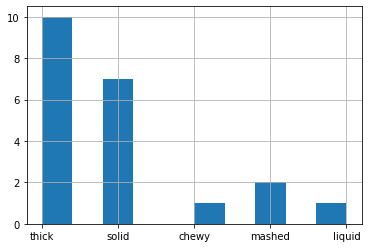

In [12]:
X_train.consistency.hist()

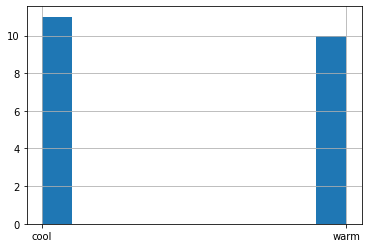

In [13]:
X_train.temperature.hist()

In [14]:
# Feature columns
feature_columns = []

for name in feature_names:
  vocabulary = dataset[name].unique()
  feature_columns.append(
      tf.feature_column.indicator_column(
          tf.feature_column.categorical_column_with_vocabulary_list(name, vocabulary)))

print('Feature columns:')
feature_columns

Feature columns:


[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='consistency', vocabulary_list=('solid', 'chewy', 'thick', 'mashed', 'liquid', 'crunchy'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='temperature', vocabulary_list=('warm', 'cool', 'normal'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='almond', vocabulary_list=('no', 'yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='anchovy', vocabulary_list=('no', 'yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='apple', vocabulary_list=('no', 'yes'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='arugula', voca

In [15]:
# Input functions
def make_input_fn(X, y, num_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((X.to_dict(orient='list'), y))
    
    if shuffle:
      dataset = dataset.shuffle(TRAIN_DATASET_SIZE)
  
    # For training, cycle thru dataset as many times as need (n_epochs=None).
    dataset = (dataset
      .repeat(num_epochs)
      .batch(TRAIN_DATASET_SIZE))
    
    return dataset
  
  return input_fn

def make_in_memory_input_fn(X, y):
  """
  Input function for in-memory training. In-memory input_fn does not use
  batching.
  """
  y = np.expand_dims(y, axis=1)

  def input_fn():
    return dict(X), y

  return input_fn

train_input_fn = make_input_fn(X_train, y_train)
in_memory_train_input_fn = make_in_memory_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)


In [16]:
def train(model_class, train_args=None, print_results=True, **model_args):
  """Trains a TensorFlow model."""
  start_time = time()
  model = model_class(**model_args, feature_columns=feature_columns)
  train_args = train_args if train_args is not None else {'max_steps': 100}
  default_input_fn = in_memory_train_input_fn if model_args.get('train_in_memory') else train_input_fn
  input_fn = train_args.pop('input_fn', default_input_fn)

  model.train(input_fn, **train_args)

  model_result = model.evaluate(eval_input_fn)
  exec_time = round(time() - start_time, 3)

  if print_results:
    clear_output()
    print('Execution time:', exec_time)
    print('Accuracy:', model_result['accuracy'])
    print(model_result)
  
  return model


def train_dnn(**args):
  """Helper function to train DNN."""
  return train(
    tf.estimator.DNNClassifier,
    train_args={'steps': 5000},
    **args,
  )


# [Linear Classifier](https://www.tensorflow.org/tutorials/estimator/linear)


## Estimators

### Linear estimator with default values.

In [ ]:
linear_est = train(tf.estimator.LinearClassifier)

Execution time: 14.159
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.33333334, 'auc_precision_recall': 0.8587837, 'average_loss': 0.80180126, 'label/mean': 0.85714287, 'loss': 0.80180126, 'precision': 1.0, 'prediction/mean': 0.4733431, 'recall': 0.33333334, 'global_step': 100}


### Linear estimator using the FTRL optimizer with regularization.

In [ ]:
train(tf.estimator.LinearClassifier, optimizer=tf.keras.optimizers.Ftrl(
  learning_rate=0.1,
  l1_regularization_strength=0.001,
))

Execution time: 15.782
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.5, 'auc_precision_recall': 0.9067307, 'average_loss': 0.77234936, 'label/mean': 0.85714287, 'loss': 0.77234936, 'precision': 1.0, 'prediction/mean': 0.47143036, 'recall': 0.33333334, 'global_step': 100}


### Linear estimator using an optimizer with a learning rate decay.

In [ ]:
train(
  tf.estimator.LinearClassifier,
  optimizer=lambda: tf.keras.optimizers.Ftrl(
    learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
      decay_rate=0.96,
      decay_steps=10000,
      initial_learning_rate=0.1,
      name=None,
      staircase=False,
    )
  )
)

Execution time: 15.263
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.5, 'auc_precision_recall': 0.9067307, 'average_loss': 0.772069, 'label/mean': 0.85714287, 'loss': 0.772069, 'precision': 1.0, 'prediction/mean': 0.471476, 'recall': 0.33333334, 'global_step': 100}


## Analysis

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpukppdpkb/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


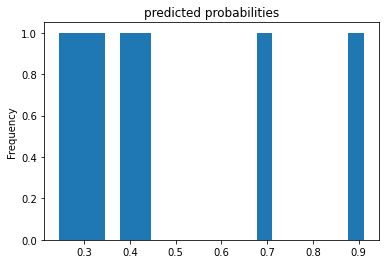

In [ ]:
# Predicted probabilities.
linear_est_predictions = list(linear_est.predict(eval_input_fn))
linear_est_probabilities = pd.Series([pred['probabilities'][1] for pred in linear_est_predictions])

linear_est_probabilities.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

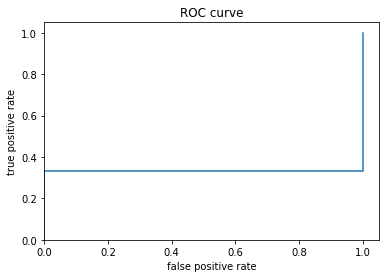

In [ ]:
# ROC curve.

fpr, tpr, _ = roc_curve(y_test, linear_est_probabilities)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

# Boosted Trees

## Estimators

In [ ]:
boosted_trees_est_default = train(
  tf.estimator.BoostedTreesClassifier,

  # "center_bias=True" forces the model to make an initial prediction before
  # using any features (e.g. use the mean of the training labels for
  # regression or log odds for classification when using cross entropy loss).
  # This is necessary for DFCs.
  center_bias=True,
  max_depth=3,
  n_batches_per_layer=1,
  n_trees=50,
  train_in_memory=True,
)

Execution time: 11.129
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.49999958, 'auc_precision_recall': 0.9047618, 'average_loss': 1.2477659, 'label/mean': 0.85714287, 'loss': 1.2477659, 'precision': 0.75, 'prediction/mean': 0.6191873, 'recall': 0.5, 'global_step': 100}


## Analysis

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl6_ne5y3/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


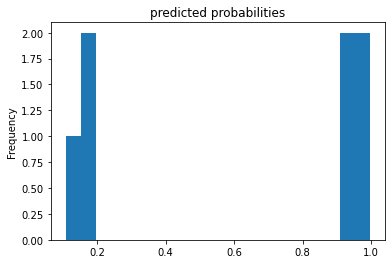

In [ ]:
# Predicted probabilities.
boosted_trees_est = boosted_trees_est_default

boosted_trees_est_predictions = list(boosted_trees_est.predict(eval_input_fn))
boosted_trees_est_probabilities = pd.Series([pred['probabilities'][1] for pred in boosted_trees_est_predictions])

boosted_trees_est_probabilities.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

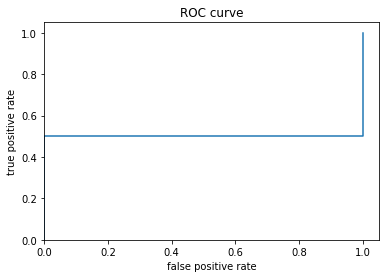

In [ ]:
# ROC curve.

fpr, tpr, _ = roc_curve(y_test, boosted_trees_est_probabilities)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

# [Local Interpretability of Boosted Trees](https://www.tensorflow.org/tutorials/estimator/boosted_trees_model_understanding#local_interpretability)

In [ ]:
boosted_trees_predictions = list(boosted_trees_est.experimental_predict_with_explanations(eval_input_fn))
labels = y_test.values
boosted_trees_probabilities = pd.Series([pred['probabilities'][1] for pred in boosted_trees_predictions])
boosted_trees_dfc = pd.DataFrame([pred['dfc'] for pred in boosted_trees_predictions])
boosted_trees_dfc.describe().T


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpl6_ne5y3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tens

,count,mean,std,min,25%,50%,75%,max
almond,7.0,0.130278,0.130226,0.000000,0.000000,0.130760,0.257683,0.265818
banana,7.0,0.078583,0.212860,-0.111412,-0.102298,-0.018781,0.265822,0.353228
mango,7.0,-0.015321,0.062677,-0.054111,-0.049787,-0.034030,-0.020878,0.122226
carrot,7.0,-0.038687,0.017746,-0.058583,-0.054969,-0.033443,-0.027434,-0.013979
cheese,7.0,-0.027814,0.076246,-0.084125,-0.078493,-0.037488,-0.024953,0.133808
mushroom,7.0,0.001169,0.078112,-0.043771,-0.040561,-0.016403,-0.012981,0.175445
arugula,7.0,0.007429,0.044016,-0.009839,-0.009391,-0.009088,-0.008766,0.107244
olive,7.0,0.018007,0.010387,0.005333,0.011885,0.017631,0.020722,0.037871
chickpea,7.0,0.014751,0.009537,0.004515,0.006438,0.013451,0.022284,0.027843
potato,7.0,-0.018455,0.008203,-0.026639,-0.023612,-0.022117,-0.014857,-0.003488


In [ ]:
# Sum of DFCs + bias == probabality.
bias = boosted_trees_predictions[0]['bias']
dfc_prob = boosted_trees_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_prob.values, boosted_trees_probabilities.values)


In [ ]:
# Boilerplate code for plotting :)

dfeval = X_test + y_test

def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example, TOP_N, ID):
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)
  return ax

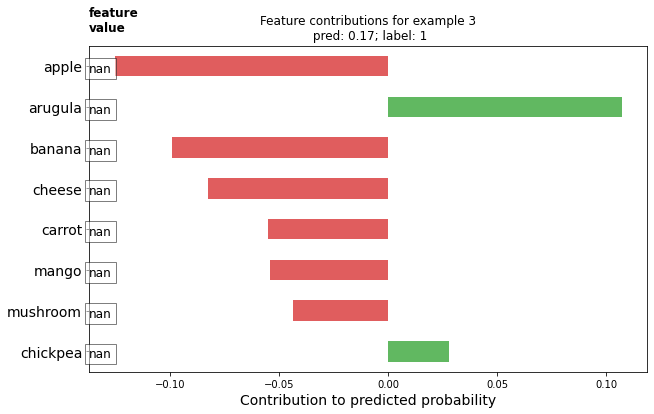

In [ ]:
# Plot results.

# Index of example to choose.
boosted_trees_ID = 3

# Example in evaluation set.
example = boosted_trees_dfc.iloc[boosted_trees_ID]

# View top n features.
TOP_N = 8

sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = plot_example(example, TOP_N, boosted_trees_ID)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'\
             .format(boosted_trees_ID, boosted_trees_probabilities[boosted_trees_ID], labels[boosted_trees_ID]))
ax.set_xlabel('Contribution to predicted probability', size=14)
plt.show()


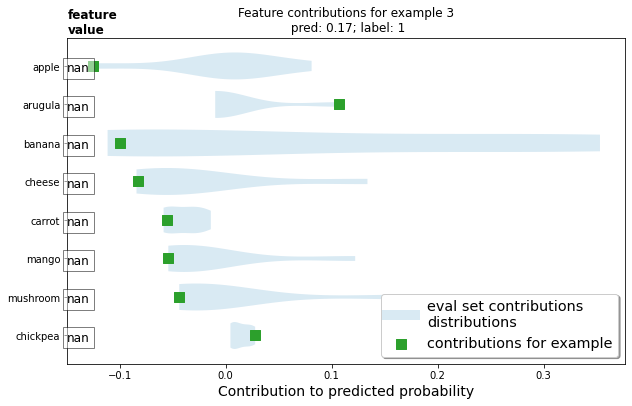

In [ ]:
# Boilerplate plotting code.
def dist_violin_plot(df_dfc, ID):
  # Initialize plot.
  fig, ax = plt.subplots(1, 1, figsize=(10, 6))

  # Create example dataframe.
  TOP_N = 8  # View top 8 features.
  example = boosted_trees_dfc.iloc[ID]
  ix = example.abs().sort_values()[-TOP_N:].index
  example = example[ix]
  example_df = example.to_frame(name='dfc')

  # Add contributions of entire distribution.
  parts=ax.violinplot([df_dfc[w] for w in ix],
                 vert=False,
                 showextrema=False,
                 widths=0.7,
                 positions=np.arange(len(ix)))
  face_color = sns_colors[0]
  alpha = 0.15
  for pc in parts['bodies']:
      pc.set_facecolor(face_color)
      pc.set_alpha(alpha)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)

  # Add local contributions.
  ax.scatter(example,
              np.arange(example.shape[0]),
              color=sns.color_palette()[2],
              s=100,
              marker="s",
              label='contributions for example')

  # Legend
  # Proxy plot, to show violinplot dist on legend.
  ax.plot([0,0], [1,1], label='eval set contributions\ndistributions',
          color=face_color, alpha=alpha, linewidth=10)
  legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large',
                     frameon=True)
  legend.get_frame().set_facecolor('white')

  # Format plot.
  ax.set_yticks(np.arange(example.shape[0]))
  ax.set_yticklabels(example.index)
  ax.grid(False, axis='y')
  ax.set_xlabel('Contribution to predicted probability', size=14)


dist_violin_plot(boosted_trees_dfc, boosted_trees_ID)
plt.title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'\
             .format(boosted_trees_ID, boosted_trees_probabilities[boosted_trees_ID], labels[boosted_trees_ID]))
plt.show()


# [Global Interpretability of Boosted Trees](https://www.tensorflow.org/tutorials/estimator/boosted_trees_model_understanding#global_feature_importances)

In general, permutation feature importance are preferred to gain-based feature importance, though both methods can be unreliable in situations where potential predictor variables vary in their scale of measurement or their number of categories and when features are correlated ([source](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-9-307)). Check out [this article](http://explained.ai/rf-importance/index.html) for an in-depth overview and great discussion on different feature importance types.

## Gain-based feature importances

Gain-based feature importances measure the loss change when splitting on a particular feature

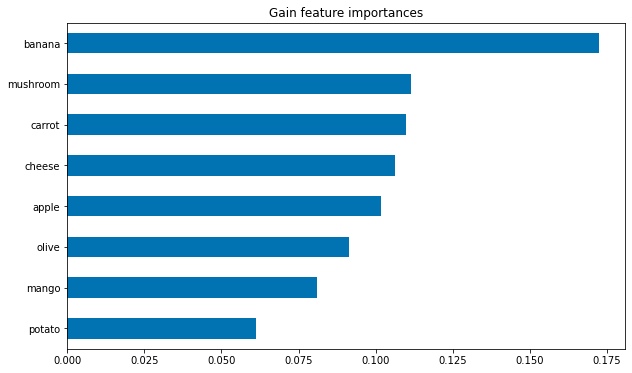

In [ ]:
importances = boosted_trees_est.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh',
          color=sns_colors[0],
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')


## Average absolute DFCs

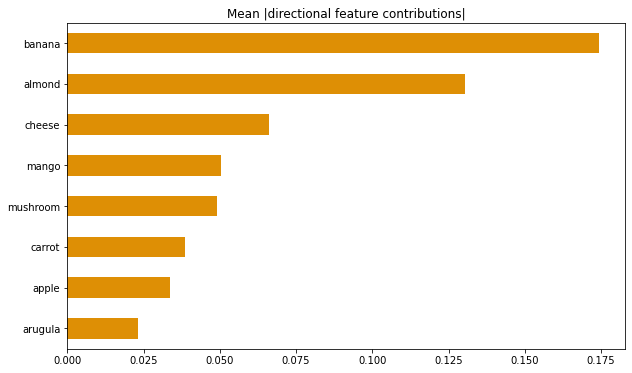

In [ ]:
dfc_mean = boosted_trees_dfc.abs().mean()
N = 8
sorted_ix = dfc_mean.abs().sort_values()[-N:].index  # Average and sort by absolute.
ax = dfc_mean[sorted_ix].plot(kind='barh',
                       color=sns_colors[1],
                       title='Mean |directional feature contributions|',
                       figsize=(10, 6))
ax.grid(False, axis='y')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


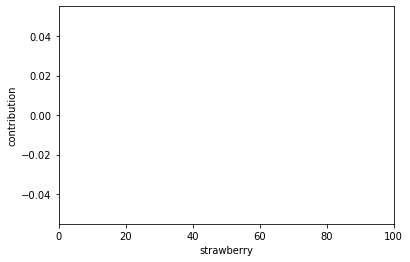

In [ ]:
# You can also see how DFCs vary as a feature value varies.

FEATURE = 'strawberry'
feature = pd.Series(boosted_trees_dfc[FEATURE].values, index=dfeval[FEATURE].values).sort_index()
ax = sns.regplot(feature.index.values, feature.values, lowess=True)
ax.set_ylabel('contribution')
ax.set_xlabel(FEATURE)
ax.set_xlim(0, 100)
plt.show()


## Permutation feature importance

Permutation feature importances are computed by evaluating model performance on the evaluation set by shuffling each feature one-by-one and attributing the change in model performance to the shuffled feature.

Features:  ['consistency', 'temperature', 'almond', 'anchovy', 'apple', 'arugula', 'banana', 'bay_leaf', 'bean', 'bell_pepper', 'black_pepper', 'blueberry', 'butter', 'carrot', 'cheese', 'chickpea', 'chili', 'chocolate', 'cookies', 'coriander', 'cranberry', 'cumin', 'egg', 'flour', 'garlic', 'ginger', 'kiwi', 'mango', 'mayonnaise', 'milk', 'mushroom', 'oil', 'okra', 'olive', 'onion', 'pea', 'peanut', 'pineapple', 'potato', 'red_pepper', 'rice', 'salt', 'skim_milk', 'spinach', 'squash', 'strawberry', 'sugar', 'tomato', 'tumeric', 'vanilla']
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-02T00:32:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl6_ne5y3/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.93665s
INFO:tensorflow:Finished evaluation at 2021-02-02-00:32:28
INFO:tensorflow:Saving dic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-02T00:32:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl6_ne5y3/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.97625s
INFO:tensorflow:Finished evaluation at 2021-02-02-00:32:31
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.42857143, accuracy_baseline = 0.85714287, auc = 0.49999958, auc_precision_recall = 0.9047618, average_loss = 1.2477659, global_step = 100, label/mean = 0.85714287, loss = 1.2477659, precision = 0.75, prediction/mean = 0.6191873, recall = 0.5
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmpl6_ne5y3/model.ckpt-100
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-02T00:32:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl6_ne5y3/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.90648s
INFO:tensorflow:Finished evaluation at 2021-02-02-00:32:33
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.42857143, accuracy_baseline = 0.85714287, auc = 0.49999958, auc_precision_recall = 0.9047618, average_loss = 1.2477659, global_step = 100, label/mean = 0.85714287, loss = 1.2477659, precision = 0.75, prediction/mean = 0.6191873, recall = 0.5
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmpl6_ne5y3/model.ckpt-100
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-02T00:32:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring para

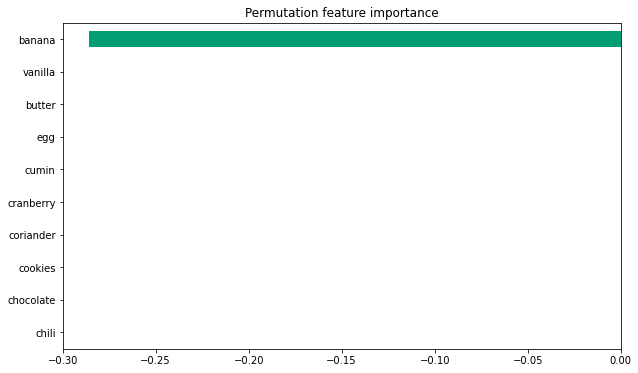

In [ ]:
def permutation_importances(est, X_eval, y_eval, metric, features):
    """Column by column, shuffle values and observe effect on eval set.

    source: http://explained.ai/rf-importance/index.html
    A similar approach can be done during training. See "Drop-column importance"
    in the above article."""
    baseline = metric(est, X_eval, y_eval)
    imp = []

    for col in features:
        save = X_eval[col].copy()
        X_eval[col] = np.random.permutation(X_eval[col])
        m = metric(est, X_eval, y_eval)
        X_eval[col] = save
        imp.append(baseline - m)

    return np.array(imp)


def accuracy_metric(est, X, y):
    """TensorFlow estimator accuracy."""
    input_fn = make_input_fn(X, y, num_epochs=1, shuffle=False)
    pred = est.evaluate(input_fn)

    return pred['accuracy']


print('Features: ', feature_names)
importances = permutation_importances(boosted_trees_est, X_test, y_test, accuracy_metric, feature_names)
df_imp = pd.Series(importances, index=feature_names)

N = 10
sorted_ix = df_imp.abs().sort_values().index
ax = df_imp[sorted_ix][-N:].plot(kind='barh', color=sns_colors[2], figsize=(10, 6))
ax.grid(False, axis='y')
ax.set_title('Permutation feature importance')
plt.show()


# Deep Neural Network (DNN)

- [TensorFlow API](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier)
- [Keras optimizers](https://keras.io/api/optimizers) ([Adam](https://keras.io/api/optimizers/adam), [Adadelta](https://keras.io/api/optimizers/adadelta), [Adagrad](https://keras.io/api/optimizers/adagrad), [Adamax](https://keras.io/api/optimizers/adamax), [FTRL](https://keras.io/api/optimizers/ftrl), [NAdam](https://keras.io/api/optimizers/Nadam), [Gradient Descent (SGD)](https://keras.io/api/optimizers/sgd). [RMSprop](https://keras.io/api/optimizers/rmsprop))

## Notes

- The best performing optimizers so far: FTRL, Adagrad.

## Estimators

### DNNClassifier with one 4-node hidden layer



In [ ]:
dnn_4 = train_dnn(hidden_units=[4])


Execution time: 17.332
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.85714287, 'auc': 0.16666667, 'auc_precision_recall': 0.7912062, 'average_loss': 0.7919404, 'label/mean': 0.85714287, 'loss': 0.7919404, 'precision': 1.0, 'prediction/mean': 0.45121622, 'recall': 0.16666667, 'global_step': 5000}


### DNNClassifier with one 10-node hidden layer using Adagrad optimizer

In [ ]:
dnn_10_adagrad = train_dnn(hidden_units=[10], optimizer='Adagrad')

Execution time: 17.43
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.8333333, 'auc_precision_recall': 0.97430825, 'average_loss': 0.7451852, 'label/mean': 0.85714287, 'loss': 0.7451852, 'precision': 1.0, 'prediction/mean': 0.44078645, 'recall': 0.33333334, 'global_step': 5000}


### DNNClassifier, 10-node hidden layer, FTRL optimizer

In [ ]:
dnn_10_ftrl = train_dnn(hidden_units=[10], optimizer='Ftrl')

Execution time: 18.599
Accuracy: 0.5714286
{'accuracy': 0.5714286, 'accuracy_baseline': 0.85714287, 'auc': 0.6666667, 'auc_precision_recall': 0.9439213, 'average_loss': 0.71792203, 'label/mean': 0.85714287, 'loss': 0.71792203, 'precision': 1.0, 'prediction/mean': 0.47357684, 'recall': 0.5, 'global_step': 5000}


### DNN, 10-node hidden layer, Adadelta optimizer

In [ ]:
dnn_10_adadelta = train_dnn(
    hidden_units=[10],
    optimizer=tf.keras.optimizers.Adadelta(
        learning_rate=0.001,
        rho=0.95, # Decay rate
        epsilon=1e-07,
    ),
)

Execution time: 18.154
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.85714287, 'auc': 0.8333333, 'auc_precision_recall': 0.97430825, 'average_loss': 0.8560448, 'label/mean': 0.85714287, 'loss': 0.8560448, 'precision': 1.0, 'prediction/mean': 0.39185026, 'recall': 0.16666667, 'global_step': 5000}


### DNNClassifier, 10-node hidden layer, Adam optimizer

In [ ]:
dnn_10_adam = train_dnn(hidden_units=[10], optimizer='Adam')

Execution time: 18.549
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.6666667, 'auc_precision_recall': 0.94392127, 'average_loss': 1.0870153, 'label/mean': 0.85714287, 'loss': 1.0870153, 'precision': 1.0, 'prediction/mean': 0.39272687, 'recall': 0.33333334, 'global_step': 5000}


### DNNClassifier, 10-node hidden layer, gradient descent (SGD) optimizer

In [ ]:
dnn_10_sgd = train_dnn(hidden_units=[10], optimizer='SGD')

Execution time: 17.572
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.5, 'auc_precision_recall': 0.9067307, 'average_loss': 1.47118, 'label/mean': 0.85714287, 'loss': 1.47118, 'precision': 1.0, 'prediction/mean': 0.37701744, 'recall': 0.33333334, 'global_step': 5000}


### DNN, 10-node hidden layer, NAdam optimizer

In [ ]:
train_dnn(
    hidden_units=[10],
    optimizer=tf.keras.optimizers.Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    ),
)

Execution time: 19.276
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.85714287, 'auc': 0.8333333, 'auc_precision_recall': 0.9743083, 'average_loss': 1.9057475, 'label/mean': 0.85714287, 'loss': 1.9057475, 'precision': 1.0, 'prediction/mean': 0.20859505, 'recall': 0.16666667, 'global_step': 5000}


### DNNClassifier, 10-node hidden layer, RMSprop optimizer

In [ ]:
dnn_10_rms_prop = train_dnn(hidden_units=[10], optimizer='RMSProp')

Execution time: 18.763
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.85714287, 'auc': 0.6666667, 'auc_precision_recall': 0.93348074, 'average_loss': 6.0725884, 'label/mean': 0.85714287, 'loss': 6.0725884, 'precision': 1.0, 'prediction/mean': 0.18464804, 'recall': 0.16666667, 'global_step': 5000}


### DNNClassifier, 20-node hidden layer, Adagrad optimizer

In [ ]:
dnn_20 = train_dnn(hidden_units=[20], optimizer='Adagrad')

Execution time: 18.041
Accuracy: 0.71428573
{'accuracy': 0.71428573, 'accuracy_baseline': 0.85714287, 'auc': 0.8333333, 'auc_precision_recall': 0.97430825, 'average_loss': 0.6821968, 'label/mean': 0.85714287, 'loss': 0.6821968, 'precision': 1.0, 'prediction/mean': 0.49699527, 'recall': 0.6666667, 'global_step': 5000}


### DNNClassifier, 20-node hidden layer, Ftrl optimizer

In [ ]:
dnn_20 = train_dnn(hidden_units=[20], optimizer='Ftrl')

Execution time: 19.11
Accuracy: 0.14285715
{'accuracy': 0.14285715, 'accuracy_baseline': 0.85714287, 'auc': 0.6666667, 'auc_precision_recall': 0.9439213, 'average_loss': 0.7539181, 'label/mean': 0.85714287, 'loss': 0.7539181, 'precision': 0.0, 'prediction/mean': 0.45698783, 'recall': 0.0, 'global_step': 5000}


### DNN, Adagrad, 1 hidden layer with the size of the feature set

In [ ]:
hidden_layer_size = len(feature_names)
dnn_adagrad_flex = train_dnn(hidden_units=[hidden_layer_size], optimizer='Adagrad')

Execution time: 17.927
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.6666667, 'auc_precision_recall': 0.9439213, 'average_loss': 0.74263567, 'label/mean': 0.85714287, 'loss': 0.74263567, 'precision': 1.0, 'prediction/mean': 0.47070077, 'recall': 0.33333334, 'global_step': 5000}


### DNN, FTRL, 1 hidden layer with the size of the feature set

In [ ]:
hidden_layer_size = len(feature_names)
dnn_ftrl_flex = train_dnn(hidden_units=[hidden_layer_size], optimizer='Ftrl')

Execution time: 19.286
Accuracy: 0.14285715
{'accuracy': 0.14285715, 'accuracy_baseline': 0.85714287, 'auc': 0.6666667, 'auc_precision_recall': 0.9439213, 'average_loss': 0.7263858, 'label/mean': 0.85714287, 'loss': 0.7263858, 'precision': 0.0, 'prediction/mean': 0.47447333, 'recall': 0.0, 'global_step': 5000}


### DNNClassifier with two hidden layers (30, 10)

In [ ]:
dnn_30_10 = train_dnn(hidden_units=[30, 10])

Execution time: 18.31
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.85714287, 'auc': 0.8333333, 'auc_precision_recall': 0.97430825, 'average_loss': 1.0499527, 'label/mean': 0.85714287, 'loss': 1.0499527, 'precision': 1.0, 'prediction/mean': 0.31663468, 'recall': 0.16666667, 'global_step': 5000}


### DNNClassifier with three hidden layers (1024, 512, 256)

In [ ]:
dnn_1024_512_256 = train_dnn(hidden_units=[1024, 512, 256])

Execution time: 52.659
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.33333334, 'auc_precision_recall': 0.8587837, 'average_loss': 1.433584, 'label/mean': 0.85714287, 'loss': 1.433584, 'precision': 1.0, 'prediction/mean': 0.33943826, 'recall': 0.33333334, 'global_step': 5000}


### DNNClassifier with learning rate decay

In [ ]:
dnn_adam_decay = train_dnn(
  hidden_units=[4],
  optimizer=lambda: tf.keras.optimizers.Adam(
    learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
      decay_rate=0.96,
      decay_steps=10000,
      initial_learning_rate=0.1,
      name=None,
      staircase=False,
    )
  )
)


Execution time: 18.543
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.85714287, 'auc': 0.5, 'auc_precision_recall': 0.90673065, 'average_loss': 2.7301376, 'label/mean': 0.85714287, 'loss': 2.7301376, 'precision': 1.0, 'prediction/mean': 0.31781626, 'recall': 0.33333334, 'global_step': 5000}


# Head-to-head

Best performers:

- Large Adagrad
- Medium Adagrad

In [18]:
NUM_FEATURES = len(feature_names)

In [17]:
# Baseline
train(tf.estimator.LinearClassifier)

Execution time: 15.047
Accuracy: 0.5714286
{'accuracy': 0.5714286, 'accuracy_baseline': 0.5714286, 'auc': 0.5833333, 'auc_precision_recall': 0.6258904, 'average_loss': 1.2321061, 'label/mean': 0.42857143, 'loss': 1.2321061, 'precision': 0.5, 'prediction/mean': 0.58057106, 'recall': 0.6666667, 'global_step': 100}


In [18]:
# Boosted trees
train(tf.estimator.BoostedTreesClassifier, max_depth=3, n_batches_per_layer=1, n_trees=50)

Execution time: 6.59
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.57142854, 'auc': 0.3750001, 'auc_precision_recall': 0.32142878, 'average_loss': 2.2884605, 'label/mean': 0.42857143, 'loss': 2.2884605, 'precision': 0.4, 'prediction/mean': 0.71217364, 'recall': 0.6666667, 'global_step': 100}


In [19]:
# Adagrad baseline
train_dnn(hidden_units=[10], optimizer='Adagrad')

Execution time: 18.391
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.5714286, 'auc': 0.33333334, 'auc_precision_recall': 0.5513704, 'average_loss': 1.0883023, 'label/mean': 0.42857143, 'loss': 1.0883023, 'precision': 0.33333334, 'prediction/mean': 0.5920969, 'recall': 0.33333334, 'global_step': 5000}


In [20]:
# FTRL baseline
train_dnn(hidden_units=[10], optimizer='Ftrl')

Execution time: 18.531
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.5714286, 'auc': 0.5416667, 'auc_precision_recall': 0.60844296, 'average_loss': 0.7370618, 'label/mean': 0.42857143, 'loss': 0.7370618, 'precision': 0.42857143, 'prediction/mean': 0.5910713, 'recall': 1.0, 'global_step': 5000}


In [21]:
# NAdam baseline
train_dnn(
    hidden_units=[10],
    optimizer=tf.keras.optimizers.Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    ),
)

Execution time: 19.541
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.5714286, 'auc': 0.4166667, 'auc_precision_recall': 0.37231266, 'average_loss': 3.8161252, 'label/mean': 0.42857143, 'loss': 3.8161252, 'precision': 0.4, 'prediction/mean': 0.6706677, 'recall': 0.6666667, 'global_step': 5000}


In [22]:
# Small Adagrad
train_dnn(hidden_units=[NUM_FEATURES // 2], optimizer='Adagrad')

Execution time: 19.116
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.5714286, 'auc': 0.5833334, 'auc_precision_recall': 0.6258904, 'average_loss': 1.1358619, 'label/mean': 0.42857143, 'loss': 1.1358619, 'precision': 0.33333334, 'prediction/mean': 0.5876808, 'recall': 0.33333334, 'global_step': 5000}


In [23]:
# Small FTRL
train_dnn(hidden_units=[NUM_FEATURES // 2], optimizer='Ftrl')

Execution time: 19.246
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.5714286, 'auc': 0.5, 'auc_precision_recall': 0.60267776, 'average_loss': 0.78623384, 'label/mean': 0.42857143, 'loss': 0.78623384, 'precision': 0.42857143, 'prediction/mean': 0.6092234, 'recall': 1.0, 'global_step': 5000}


In [24]:
# Small NAdam
train_dnn(
    hidden_units=[NUM_FEATURES // 2],
    optimizer=tf.keras.optimizers.Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    ),
)

Execution time: 19.526
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.5714286, 'auc': 0.37500003, 'auc_precision_recall': 0.35992822, 'average_loss': 5.066918, 'label/mean': 0.42857143, 'loss': 5.066918, 'precision': 0.25, 'prediction/mean': 0.58168995, 'recall': 0.33333334, 'global_step': 5000}


In [25]:
# Medium Adagrad
train_dnn(hidden_units=[NUM_FEATURES], optimizer='Adagrad')

Execution time: 18.829
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.5714286, 'auc': 0.5, 'auc_precision_recall': 0.5945349, 'average_loss': 1.1272762, 'label/mean': 0.42857143, 'loss': 1.1272762, 'precision': 0.25, 'prediction/mean': 0.6078267, 'recall': 0.33333334, 'global_step': 5000}


In [26]:
# Medium NAdam
train_dnn(
    hidden_units=[NUM_FEATURES],
    optimizer=tf.keras.optimizers.Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    ),
)

Execution time: 19.698
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.5714286, 'auc': 0.37500003, 'auc_precision_recall': 0.35992822, 'average_loss': 5.2563963, 'label/mean': 0.42857143, 'loss': 5.2563963, 'precision': 0.25, 'prediction/mean': 0.573682, 'recall': 0.33333334, 'global_step': 5000}


In [19]:
# Large Adagrad
large_adagrad = train_dnn(hidden_units=[NUM_FEATURES * 2], optimizer='Adagrad')

Execution time: 19.101
Accuracy: 0.71428573
{'accuracy': 0.71428573, 'accuracy_baseline': 0.5714286, 'auc': 0.6666667, 'auc_precision_recall': 0.79726744, 'average_loss': 1.004925, 'label/mean': 0.5714286, 'loss': 1.004925, 'precision': 0.6666667, 'prediction/mean': 0.8222824, 'recall': 1.0, 'global_step': 5000}


In [28]:
# Large NAdam
train_dnn(
    hidden_units=[NUM_FEATURES * 2],
    optimizer=tf.keras.optimizers.Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    ),
)

Execution time: 19.65
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.5714286, 'auc': 0.37500003, 'auc_precision_recall': 0.35992822, 'average_loss': 5.791715, 'label/mean': 0.42857143, 'loss': 5.791715, 'precision': 0.25, 'prediction/mean': 0.5826025, 'recall': 0.33333334, 'global_step': 5000}


In [29]:
# 2-layer Adagrad
train_dnn(hidden_units=[NUM_FEATURES * 2, NUM_FEATURES], optimizer='Adagrad')

Execution time: 20.451
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.5714286, 'auc': 0.5, 'auc_precision_recall': 0.5945349, 'average_loss': 1.3563241, 'label/mean': 0.42857143, 'loss': 1.3563241, 'precision': 0.4, 'prediction/mean': 0.5892483, 'recall': 0.6666667, 'global_step': 5000}


In [30]:
# 2-layer NAdam
train_dnn(
    hidden_units=[NUM_FEATURES * 2, NUM_FEATURES],
    optimizer=tf.keras.optimizers.Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    ),
)

Execution time: 22.409
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.5714286, 'auc': 0.37500003, 'auc_precision_recall': 0.35992822, 'average_loss': 7.0079374, 'label/mean': 0.42857143, 'loss': 7.0079374, 'precision': 0.25, 'prediction/mean': 0.61790943, 'recall': 0.33333334, 'global_step': 5000}


In [31]:
# 3-layer Adagrad
train_dnn(hidden_units=[NUM_FEATURES * 4, NUM_FEATURES * 2, NUM_FEATURES], optimizer='Adagrad')

Execution time: 21.378
Accuracy: 0.42857143
{'accuracy': 0.42857143, 'accuracy_baseline': 0.5714286, 'auc': 0.5, 'auc_precision_recall': 0.5945349, 'average_loss': 2.257445, 'label/mean': 0.42857143, 'loss': 2.257445, 'precision': 0.4, 'prediction/mean': 0.61074543, 'recall': 0.6666667, 'global_step': 5000}


In [32]:
# 3-layer NAdam
train_dnn(
    hidden_units=[NUM_FEATURES * 4, NUM_FEATURES * 2, NUM_FEATURES],
    optimizer=tf.keras.optimizers.Nadam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    ),
)

Execution time: 25.158
Accuracy: 0.2857143
{'accuracy': 0.2857143, 'accuracy_baseline': 0.5714286, 'auc': 0.33333334, 'auc_precision_recall': 0.33215043, 'average_loss': 8.188621, 'label/mean': 0.42857143, 'loss': 8.188621, 'precision': 0.25, 'prediction/mean': 0.5740902, 'recall': 0.33333334, 'global_step': 5000}


# [Save and download model](https://www.tensorflow.org/guide/estimator#savedmodels_from_estimators)
Note: this only works in Chrome.

In [28]:
from google.colab import files
from os import path
from tempfile import mkdtemp

model = large_adagrad
BASE_PATH = path.join(mkdtemp(), 'jayne-eats-model')
serving_input_fn = tf.estimator.export.build_parsing_serving_input_receiver_fn(
  tf.feature_column.make_parse_example_spec(feature_columns))

model_path = model.export_saved_model(BASE_PATH, serving_input_fn)

files.download(model_path.decode('utf-8'))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Signatures INCLUDED in export for Classify: ['serving_default', 'classification']
INFO:tensorflow:Signatures INCLUDED in export for Regress: ['regression']
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:Restoring parameters from /tmp/tmp7nrsx_be/model.ckpt-5000
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpwqx8178n/jayne-eats-model/temp-1612748067/saved_model.pb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>